# **Model Training**

# **Imports required**

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Import Seaborn
!pip install seaborn
import seaborn as sns
#Machine Learning Imports
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN # Import the DBSCAN class
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# **Loading the data**

In [24]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
df=pd.read_csv('/content/drive/MyDrive/titanic.csv')
df

Mounted at /content/drive


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


# **Handling Missing Values**

In [28]:

# Fill missing values
df['Age'][df['Age'].isnull()] = round(np.mean(df['Age']), 0)  # Fill missing Age with mean
df['Fare'][df['Fare'].isnull()] = np.mean(df['Fare'])  # Fill missing Fare with mean
df['SibSp'][df['SibSp'].isnull()] = 0  # Assuming missing siblings/spouses means 0
df['Parch'][df['Parch'].isnull()] = 0  # Assuming missing parents/children means 0
df['Sex'] = df['Sex'].fillna('unknown')  # Fill missing Sex with 'unknown'
df['Cabin'] = df['Cabin'].fillna('unknown')  # Fill missing Cabin with 'unknown'
df['Embarked'] = df['Embarked'].fillna('unknown')  # Fill missing Embarked with 'unknown'

# Check for remaining missing values
missing_values = df.isnull().sum()
print(missing_values)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


<ipython-input-28-df8a27f02da9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][df['Age'].isnull()] = round(np.mean(df['Age']), 0)  # Fill missing Age with mean
<ipython-input-28-df8a27f02da9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fare'][df['Fare'].isnull()] = np.mean(df['Fare'])  # Fill missing Fare with mean
<ipython-input-28-df8a27f02da9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SibSp'][df['SibS

In [29]:
# Separate features and target variable
X = df.drop('Survived', axis=1)
Y = df['Survived']

# **Splitting Dataset into train and test**

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# **Data Normalization**

In [31]:
# Handle non-numeric columns before scaling
X_train = X_train.select_dtypes(include=['number'])
X_test = X_test.select_dtypes(include=['number'])

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Pattern Identification**

# **K-Means Clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


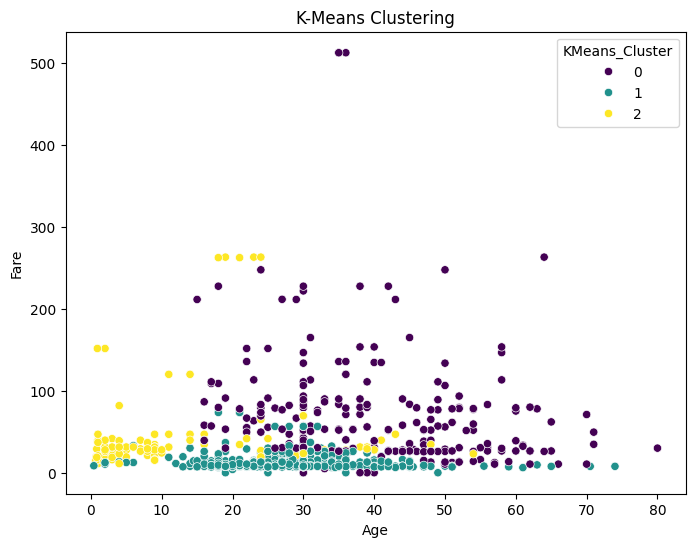

In [32]:
# Selecting features for clustering
features = df[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Applying K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_features)

# Plotting the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', hue='KMeans_Cluster', data=df, palette='viridis')
plt.title('K-Means Clustering')
plt.show()


K-Means is used to group passengers into clusters based on characteristics such as age, fare, passenger class (Pclass), number of siblings/spouses aboard (SibSp), and number of parents/children aboard (Parch).

By scaling these features and applying the K-Means algorithm, we can identify clusters of passengers who share similar profiles.

This can reveal patterns, such as groups of passengers with similar socioeconomic backgrounds or travel companions.

For instance, a cluster might represent young passengers traveling in third class with family, while another might represent older passengers in first class. These insights can help in understanding the demographics and behavior of different passenger segments.

# **DBSCAN Clustering**

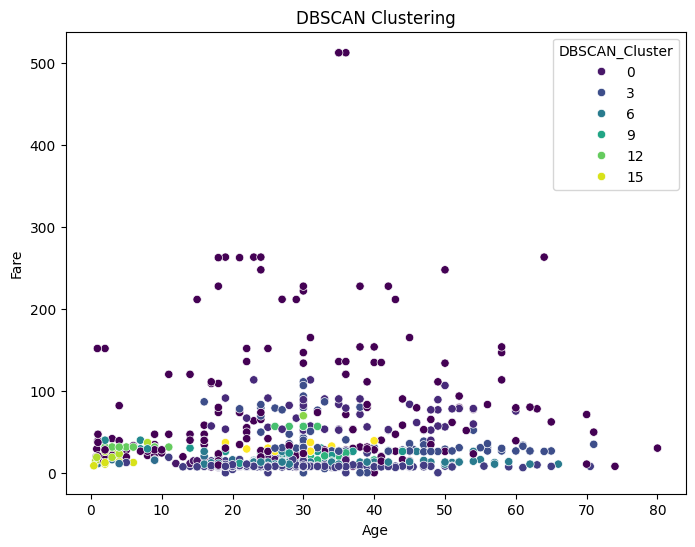

In [39]:
# Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_features)

# Plotting the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', hue='DBSCAN_Cluster', data=df, palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()


It is a clustering method that identifies dense regions in the data and separates them from sparse regions, which are considered noise.

Unlike K-Means, DBSCAN does not require specifying the number of clusters beforehand and is particularly effective in identifying clusters of varying shapes and sizes.

It can uncover natural groupings of passengers based on their age, fare, Pclass, SibSp, and Parch, while also identifying outliers who do not fit into any dense group.

For example, DBSCAN might reveal a dense cluster of middle-aged passengers paying similar fares, traveling in second class, while flagging outliers such as extremely wealthy passengers paying exceptionally high fares.

This approach is useful for discovering inherent structures in the data and identifying unique or anomalous passenger profiles.

# **Classification models**

In [33]:
# Define models in a dictionary
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'AdaBoost': AdaBoostClassifier(),
    'Naive Bayes': GaussianNB(),
    'MLP Neural Network': MLPClassifier(max_iter=10000)
}

In [34]:
from sklearn.model_selection import cross_val_score
# Function to evaluate models
def evaluate_models(models, X, Y):
    results = {}
    for name, model in models.items():
        scores = cross_val_score(model, X, Y, cv=5, scoring='accuracy')
        results[name] = {
            'mean_accuracy': scores.mean(),
            'std_accuracy': scores.std(),
            'scores': scores
        }
        print(f'{name} Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f})')
    return results

# **Accuracies of different classification models**

In [35]:
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")

Logistic Regression Accuracy: 0.73
Decision Tree Accuracy: 0.67
Random Forest Accuracy: 0.72
SVM Accuracy: 0.75
KNN Accuracy: 0.72
Gradient Boosting Accuracy: 0.77
XGBoost Accuracy: 0.66
AdaBoost Accuracy: 0.74
Naive Bayes Accuracy: 0.71
MLP Neural Network Accuracy: 0.73


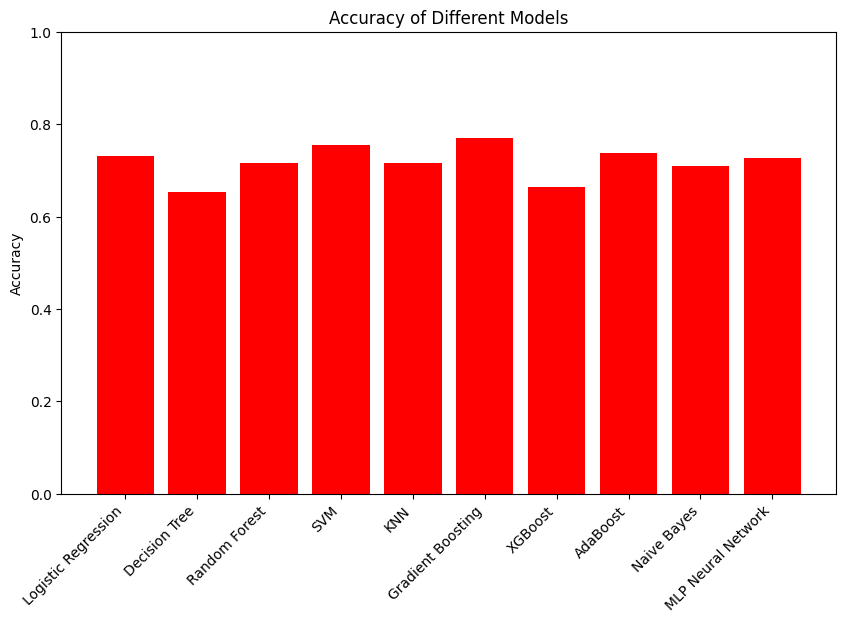

In [36]:
accuracies = {}

for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    accuracies[name] = accuracy

# Create a vertical bar plot for accuracies
plt.figure(figsize=(10, 6))
plt.bar(list(accuracies.keys()), list(accuracies.values()), color='red')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.show()

